In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train=y_train.reshape(-1,)#2d array to 1d
y_test=y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

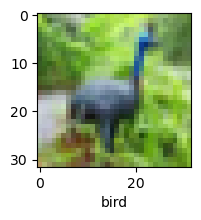

In [7]:
plot_sample(X_train,y_train,6)

In [8]:
X_train=X_train/255 #pixel value in the range of 0-1
X_test=X_test/255

In [9]:
#only ann used 

ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #1st layer dimension of image
    layers.Dense(3000,activation='relu'), 
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')  # 10 class so 10 output layer
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 71s 45ms/step - loss: 1.8146 - accuracy: 0.3543
Epoch 2/3
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6224 - accuracy: 0.4260
Epoch 3/3
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5436 - accuracy: 0.4554


In [10]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 16ms/step - loss: 1.6094 - accuracy: 0.4166


[1.6094303131103516, 0.41659998893737793]

In [12]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(input_shape=()),
    layers.Dense(300,activation='relu'), #2 deep layers 
    layers.Dense(100,activation='relu'),# can decrease the neurons due convlution
    layers.Dense(10,activation='sigmoid')  # 10 class so 10 output layer
])

In [13]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [15]:
cnn.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0522 - accuracy: 0.6302
Epoch 2/3
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8937 - accuracy: 0.6867
Epoch 3/3
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7765 - accuracy: 0.7272


In [16]:
cnn.evaluate(X_test,y_test)# testing

313/313 [==============================] - 3s 9ms/step - loss: 0.8880 - accuracy: 0.6953


[0.8880035877227783, 0.6952999830245972]

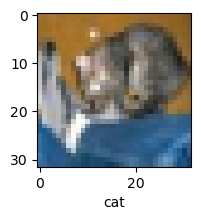

In [17]:
plot_sample(X_test,y_test,0)

In [20]:
y_pred=cnn.predict(X_test[:5])# y_pred single array contain the probability distribution of all 10 class 
y_pred#the max probability index is the respective category

1/1 [==============================] - 0s 40ms/step


array([[2.33345643e-01, 4.37543005e-01, 4.29300338e-01, 8.24028671e-01,
        1.75541639e-01, 5.78699350e-01, 4.46230233e-01, 1.58794165e-01,
        2.68201023e-01, 1.75504401e-01],
       [9.31091070e-01, 9.98329043e-01, 2.28193030e-02, 1.06421849e-02,
        1.63018261e-03, 1.69807393e-03, 1.51301268e-03, 3.91394453e-04,
        9.98841047e-01, 9.79272723e-01],
       [6.61032915e-01, 9.40983236e-01, 1.18860662e-01, 1.43313915e-01,
        6.85262531e-02, 2.90335584e-02, 2.35818159e-02, 4.72456254e-02,
        9.53979611e-01, 7.75038600e-01],
       [9.91528213e-01, 4.33903515e-01, 5.50120056e-01, 9.92392674e-02,
        2.12126136e-01, 2.73470599e-02, 9.14163366e-02, 1.38688125e-02,
        9.53105092e-01, 2.25715324e-01],
       [6.60808012e-03, 3.89179215e-02, 6.96118236e-01, 7.83144951e-01,
        9.90394950e-01, 6.37881160e-01, 8.69912565e-01, 3.94008979e-02,
        8.32130611e-02, 1.54612157e-02]], dtype=float32)

In [24]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes


[3, 8, 8, 0, 4]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)